Train set:(133, 13)
Test set:(45, 13)


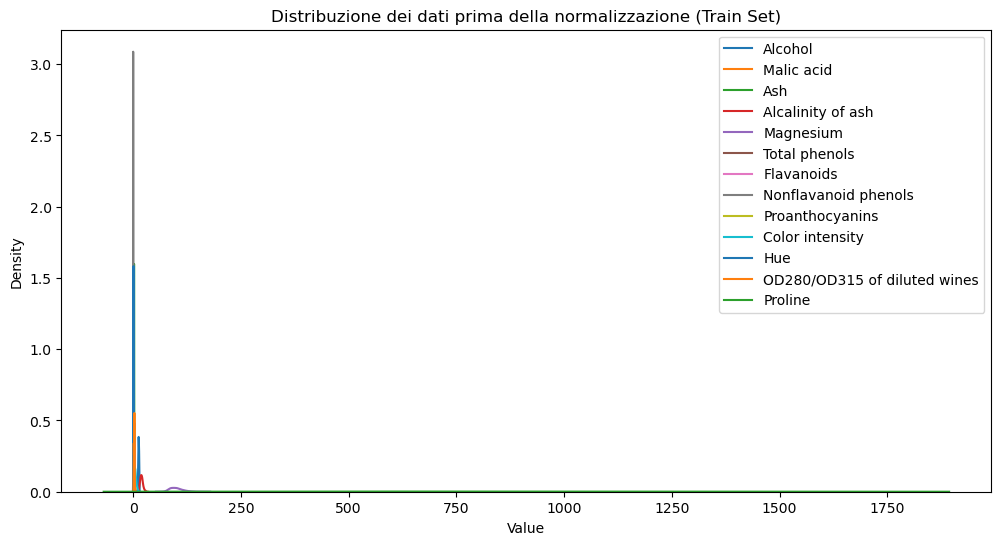

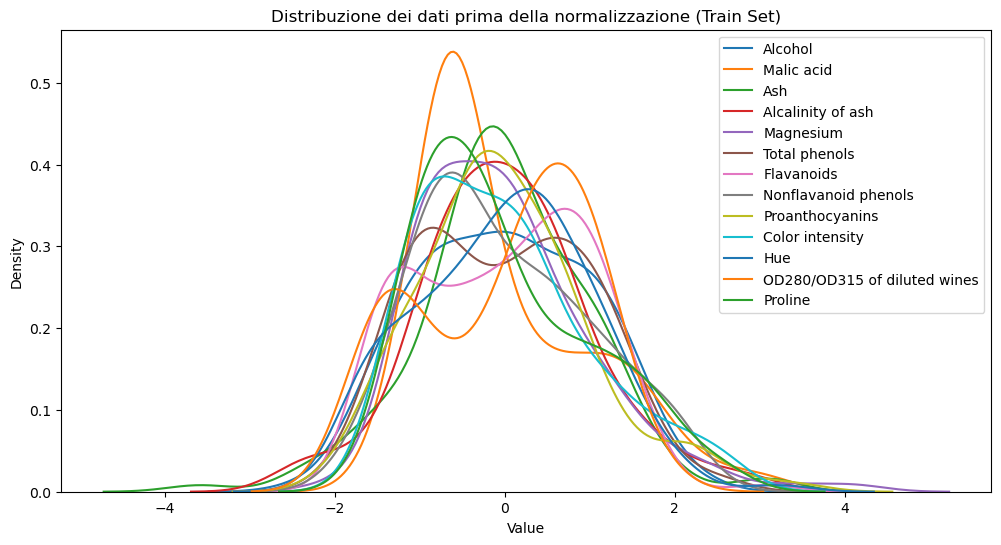

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import plot_confusion_matrix

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

column_names = [
    "Label",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

data = pd.read_csv(url, header=None, names=column_names)

things = data.values
Y = things[:, 0]
X = things[:, 1:14]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

print('Train set:'+str(X_train.shape))
print('Test set:'+str(X_test.shape))

column1 = [
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
X_train_df1 = pd.DataFrame(X_train, columns=column1)

plt.figure(figsize=(12, 6))
plt.title("Distribuzione dei dati prima della normalizzazione (Train Set)")
for feature in X_train_df1.columns:
    sn.kdeplot(X_train_df1[feature], label=feature)
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


# Normalizzazione dei dati utilizzando StandardScaler sul train set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Normalizzazione del test set utilizzando la media e la deviazione standard del train set
X_test = scaler.transform(X_test)

column2 = [
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
X_train_df2 = pd.DataFrame(X_train, columns=column2)

plt.figure(figsize=(12, 6))
plt.title("Distribuzione dei dati prima della normalizzazione (Train Set)")
for feature in X_train_df2.columns:
    sn.kdeplot(X_train_df2[feature], label=feature)
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [7]:
print('Dataset info')
print()
data.info()

Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    floa

In [8]:
print('First 5 samples')
data.head()

First 5 samples


Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [9]:
data1 = data.iloc[:, 1:]
print('Statistics')
data1.describe()

Statistics


Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

Box plots
AxesSubplot(0.125,0.11;0.775x0.77)


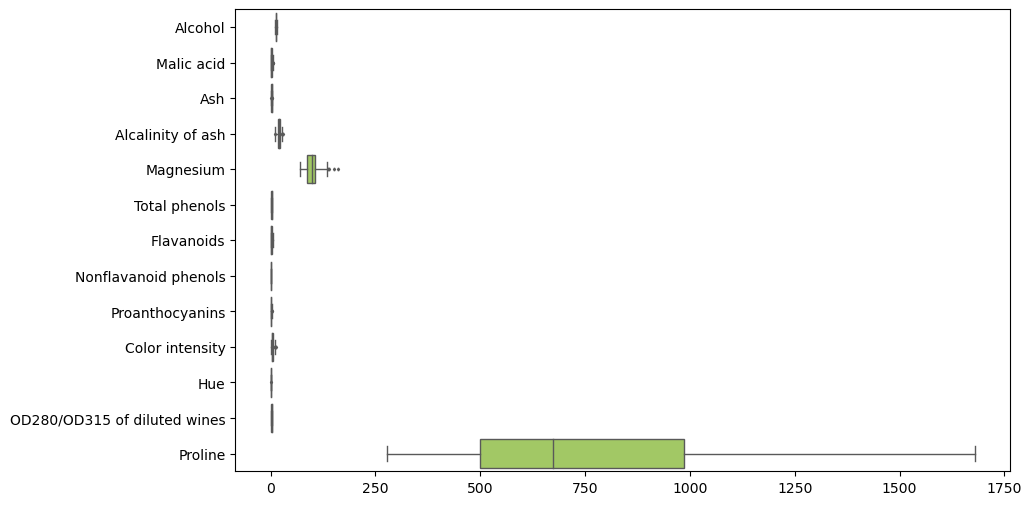

In [10]:
data1 = data.iloc[:, 1:]
print('Box plots')
plt.figure(figsize=(10,6))
print(sn.boxplot(data = data1, linewidth=1, fliersize=1.5, palette="Set2", orient ='h'))

Correlation matrix
AxesSubplot(0.125,0.11;0.62x0.77)


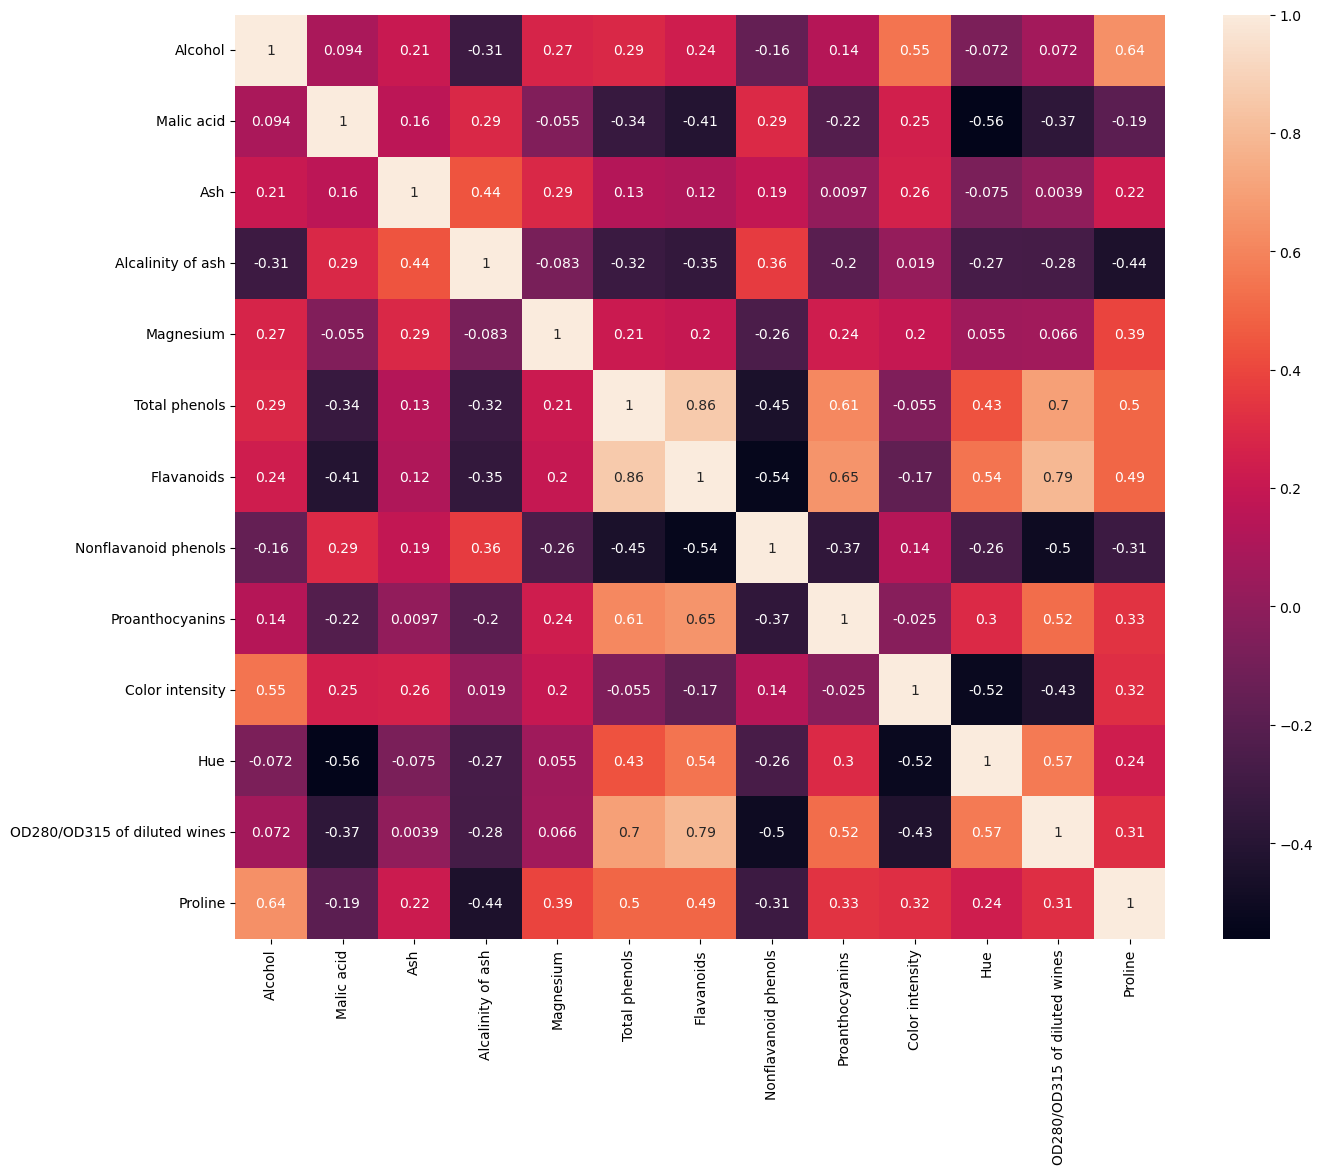

In [11]:
data1 = data.iloc[:, 1:]
print('Correlation matrix')
plt.figure(figsize=(15,12))
corrMatrix = data1.corr()
print(sn.heatmap(corrMatrix, annot=True))

C:\Users\anton\AppData\Local\Temp\ipykernel_23692\3516984975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][ind] = 'Regione 1'


Pair plots


<Figure size 2000x2000 with 0 Axes>

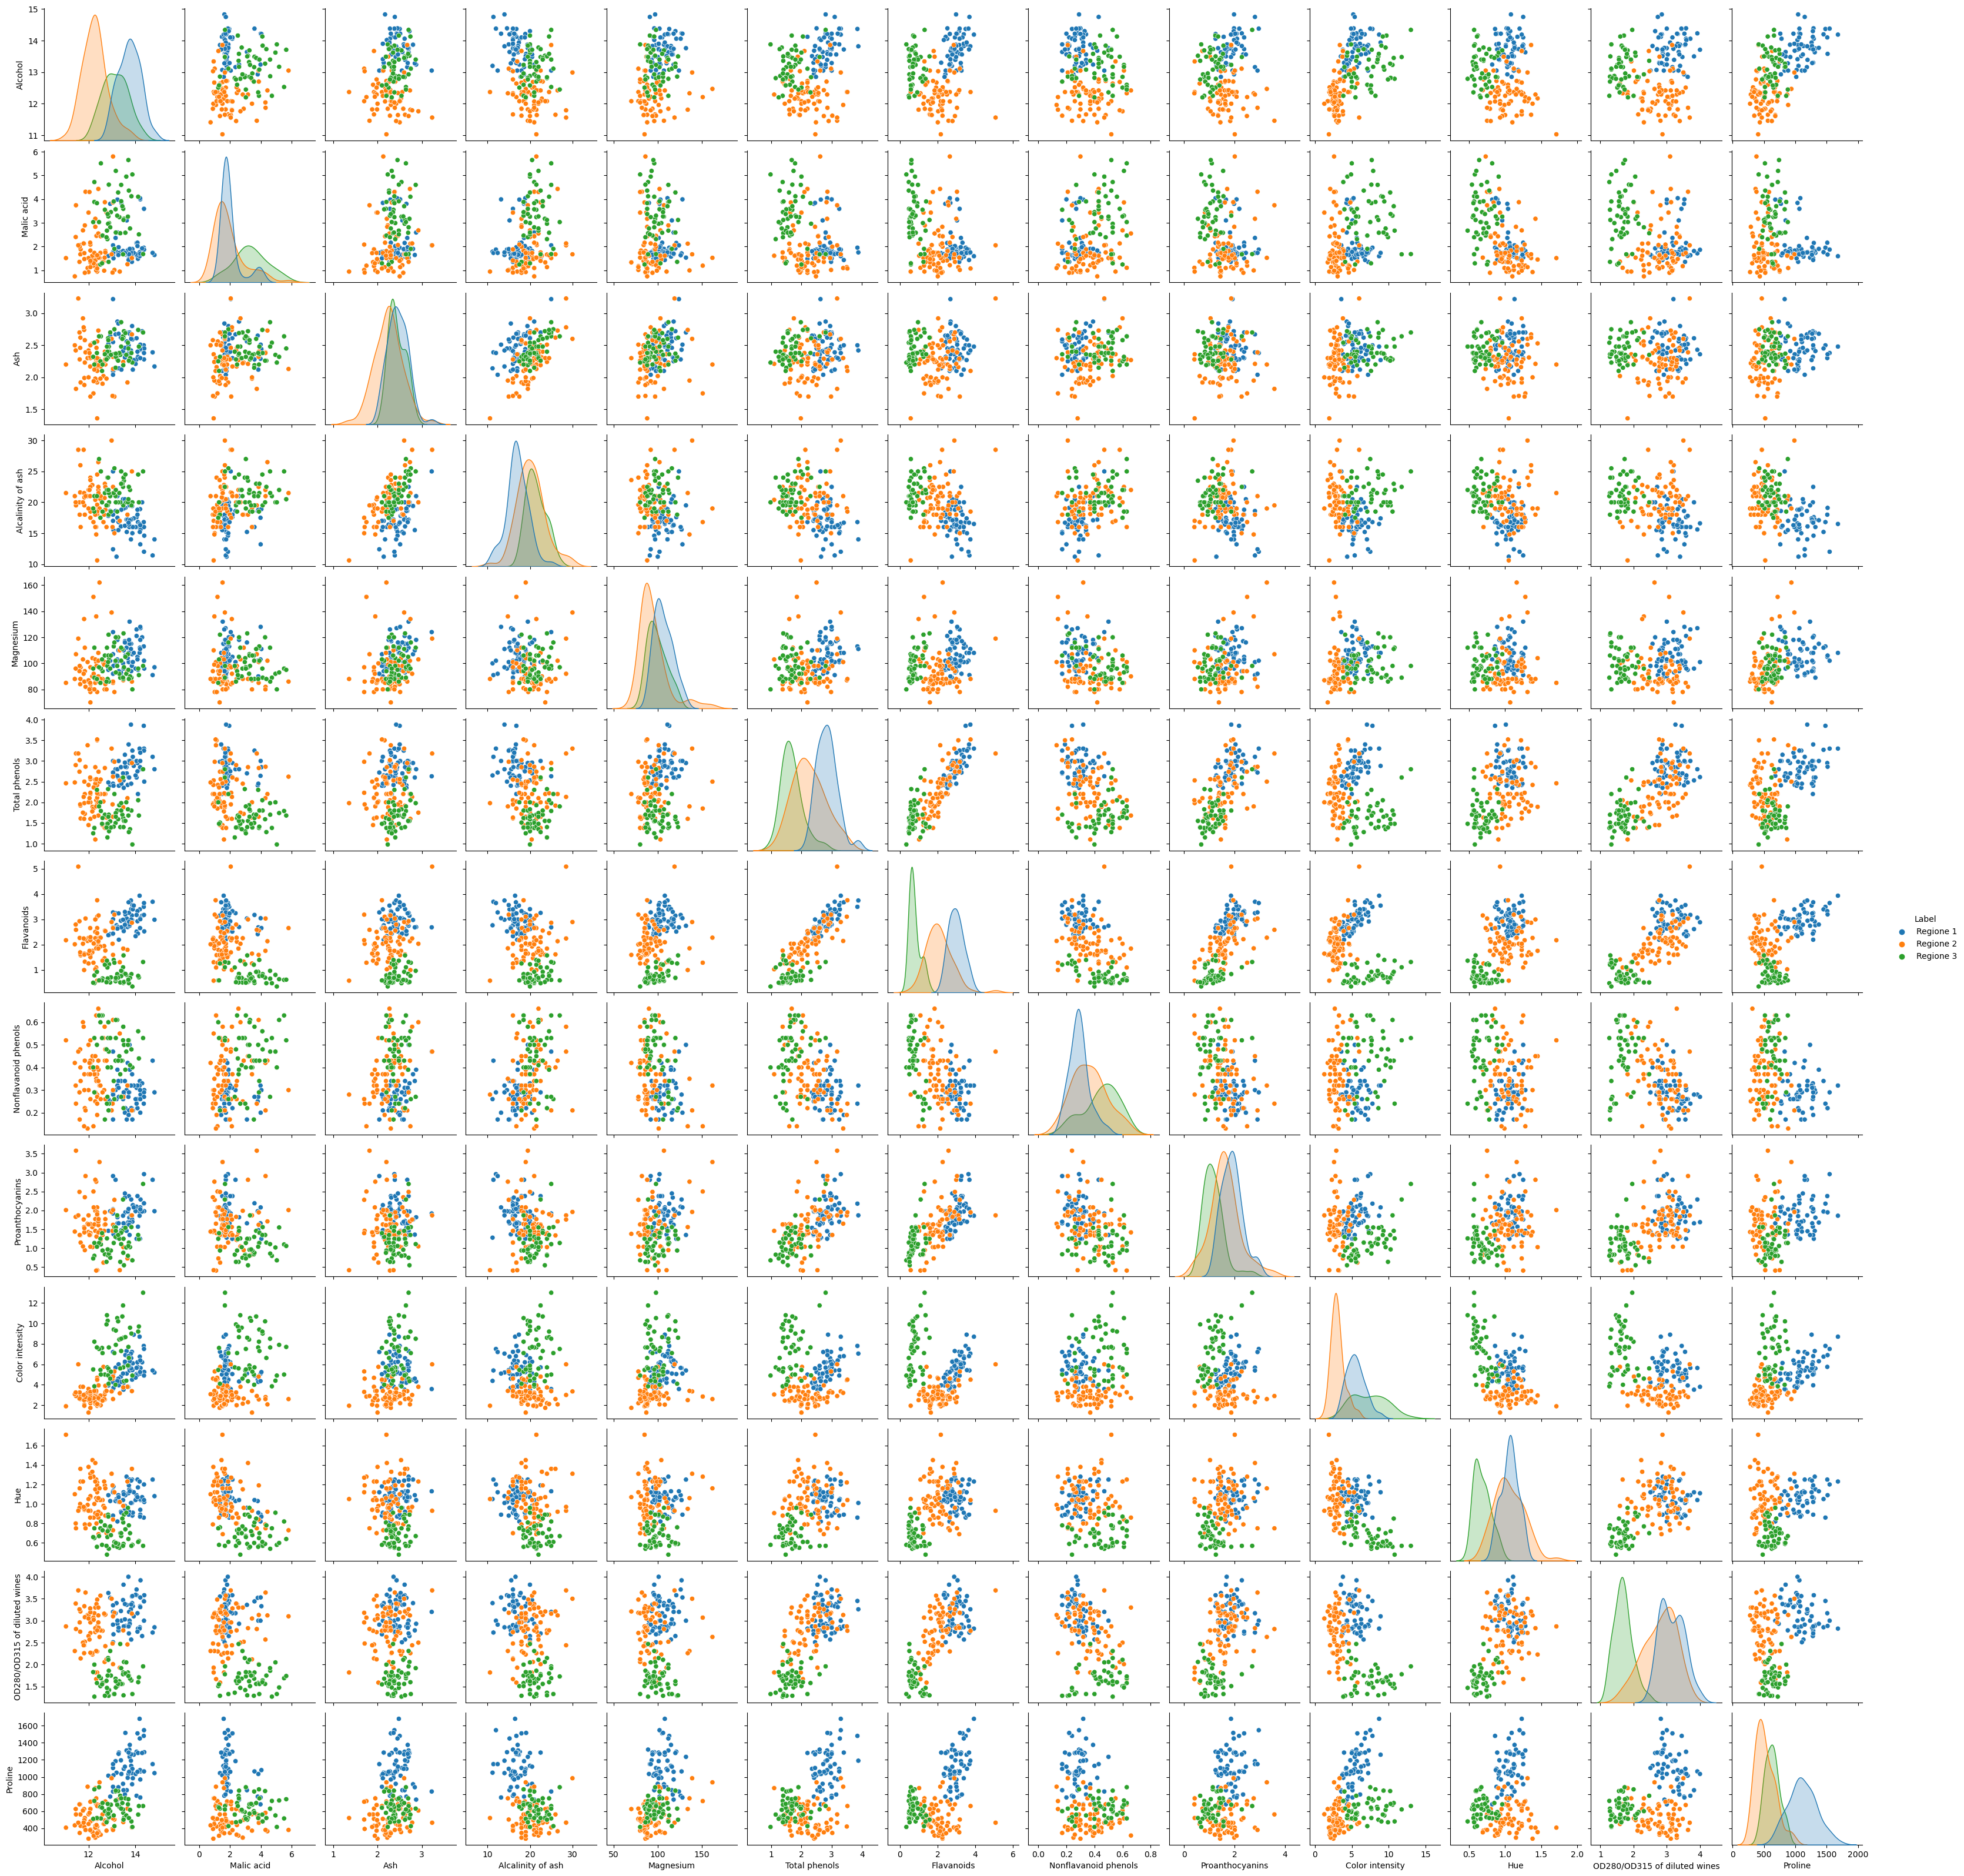

In [12]:
df = data

for ind in df.index: 
    if df['Label'][ind] == 1:
        df['Label'][ind] = 'Regione 1'
    elif df['Label'][ind] == 2:
        df['Label'][ind] = 'Regione 2'
    elif df['Label'][ind] == 3:
        df['Label'][ind] = 'Regione 3'
print('Pair plots')
plt.figure(figsize=(20,20))
print(sn.pairplot(data=df, hue='Label', vars=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']))

Histogram


<AxesSubplot:>

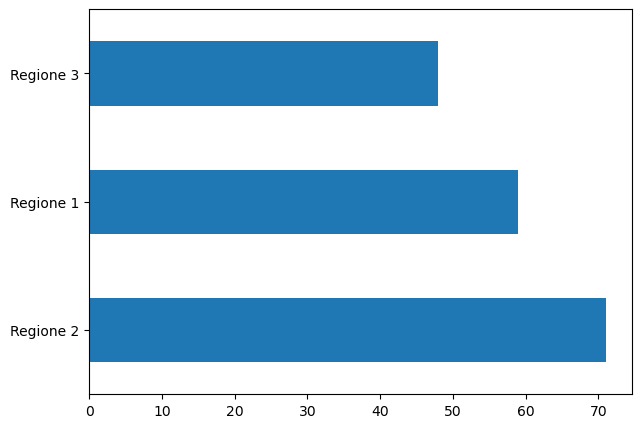

In [13]:
print('Histogram')
plt.figure(figsize=(7,5))
data.Label.value_counts().plot(kind='barh')

[36.4 55.  66.9 74.3 81.1 85.6 89.3 92.  94.3 96.2 97.9 99.2 99.9]


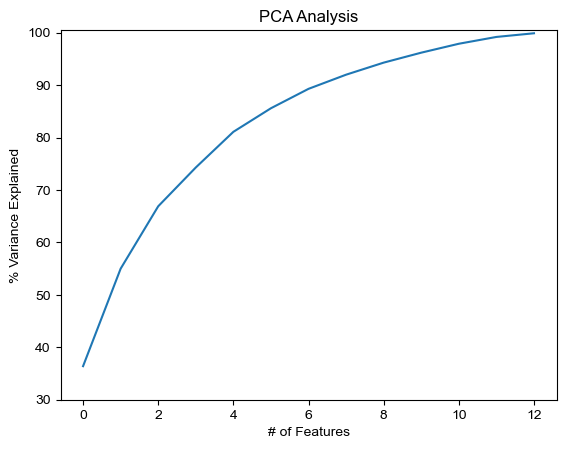

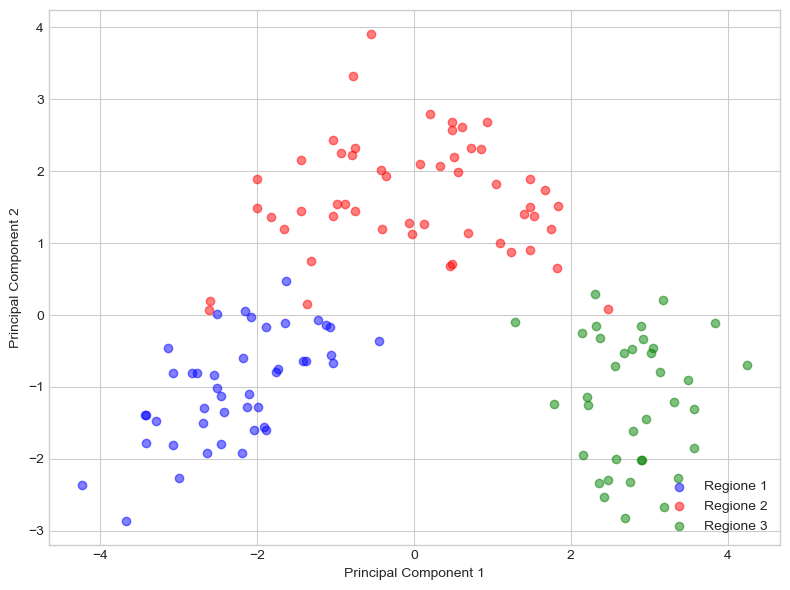

In [34]:
# PCA

# Find a good n_components

# Make an instance of the model
pca = PCA()

# Fit PCA on training set
pca.fit(X_train)

#calculate variance ratios
variance = pca.explained_variance_ratio_ 

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.figure()
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)
print(var)

# Apply PCA

pca = PCA(n_components=2)
pca.fit(X_train)

# Apply the mapping to training, validation and the test set
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for num, lab, col in zip((1, 2, 3), ('Regione 1', 'Regione 2', 'Regione 3'), ('blue', 'red', 'green')):
        plt.scatter(X_train_pca[Y_train == num, 0], X_train_pca[Y_train == num, 1], label=lab, c=col, alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
pca = PCA(n_components=1)
pca.fit(X_train)

# Apply the mapping to training, validation and the test set
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

C:\Users\anton\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

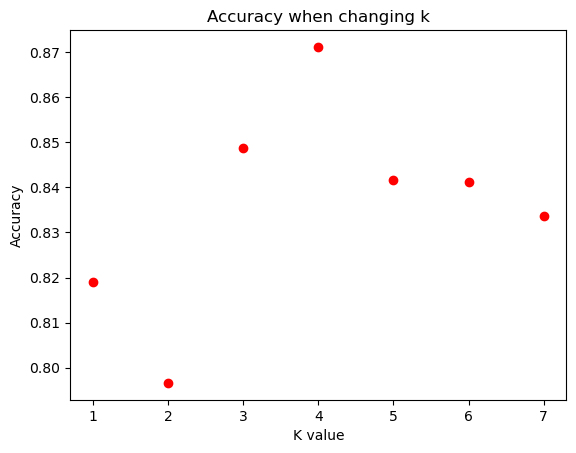


The best accuracy is 0.871, obtained with k = 4


Accuracy for k = 4 on the test set is 0.844



              precision    recall  f1-score   support

   Regione 1       0.82      0.93      0.87        15
   Regione 2       0.82      0.78      0.80        18
   Regione 3       0.91      0.83      0.87        12

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.85        45
weighted avg       0.85      0.84      0.84        45



C:\Users\anton\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

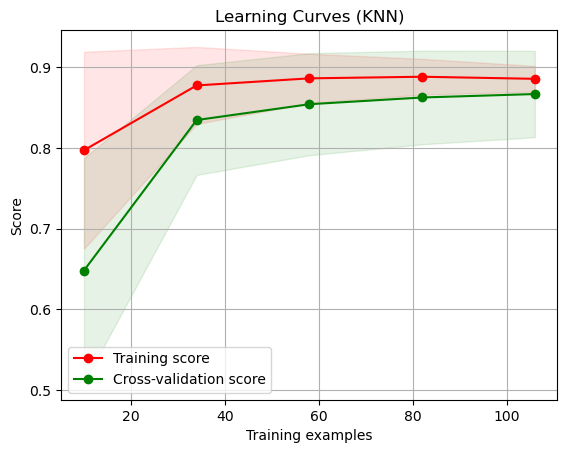

C:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: Fu

Confusion matrix, without normalization
[[14  1  0]
 [ 3 14  1]
 [ 0  2 10]]
Normalized confusion matrix
[[0.93333333 0.06666667 0.        ]
 [0.16666667 0.77777778 0.05555556]
 [0.         0.16666667 0.83333333]]


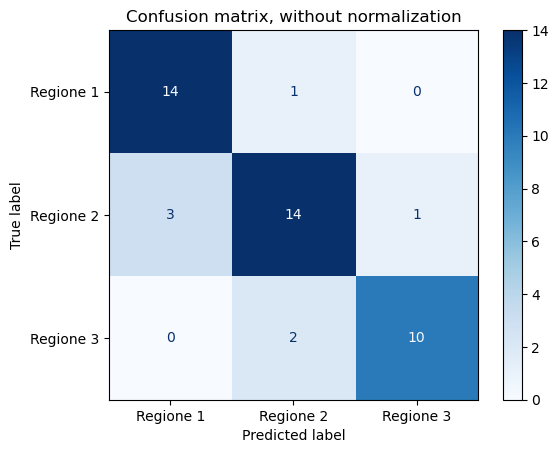

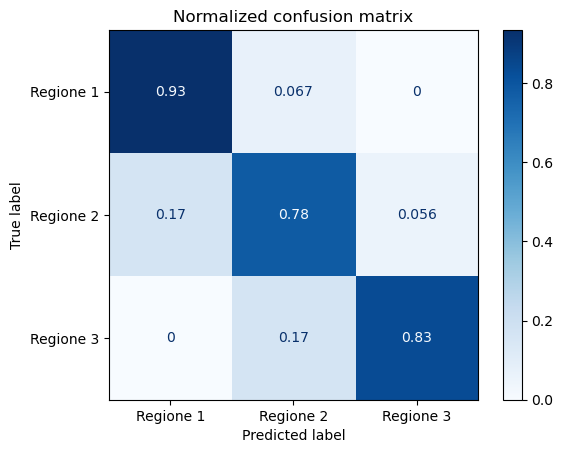

In [35]:
# K-Nearest Neighbors with 5-fold Cross Validation
                           
k_list = range(1, 8)
scores_list = []
max_score = 0
top_k = 0
                            
for n_neighbors in k_list:
                            
    # Create a KNN classifier and fit it to the training data   
    neigh = KNeighborsClassifier(n_neighbors)
    neigh.fit(X_train_pca, Y_train)
    
    cv_scores = cross_val_score(neigh, X_train_pca, Y_train, cv=5)
    score = np.mean(cv_scores)
    scores_list.append(score)
    if(score > max_score):
        max_score = score
        top_k = n_neighbors
        
    #print("\tMean accuracy on the validation set with k = %d is %.3f\n" % (n_neighbors, score))
 
plt.plot(k_list, scores_list, 'ro')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title("Accuracy when changing k")
plt.show()

print("\nThe best accuracy is %.3f, obtained with k = %d"
      % (max_score, top_k))

neigh = KNeighborsClassifier(top_k)
neigh.fit(X_train_pca, Y_train)

score = neigh.score(X_test_pca, Y_test)
print()
print("\nAccuracy for k = %d on the test set is %.3f\n\n\n"
      % (top_k, score))

y_pred = neigh.predict(X_test_pca)

print(classification_report(Y_test, y_pred, target_names = ['Regione 1', 'Regione 2', 'Regione 3']))

title = "Learning Curves (KNN)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
plot_learning_curve(neigh, title, X_train_pca, Y_train, cv=cv, n_jobs=4)
plt.show()

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(neigh, X_test_pca, Y_test, display_labels=['Regione 1', 'Regione 2', 'Regione 3'], cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

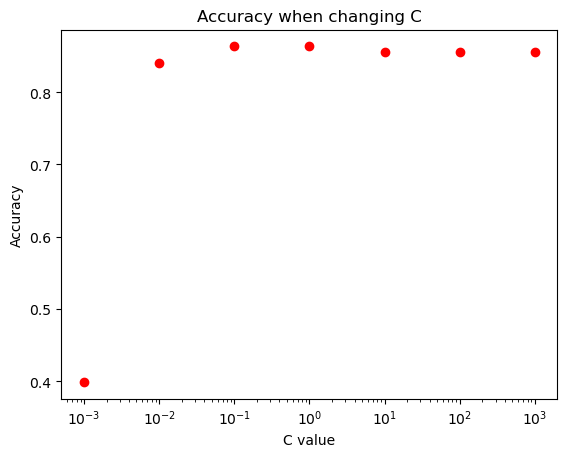


The best accuracy is 0.864, obtained with C = 10^-1


Accuracy for C = 10^-1 on the test set is 0.822



              precision    recall  f1-score   support

   Regione 1       0.81      0.87      0.84        15
   Regione 2       0.78      0.78      0.78        18
   Regione 3       0.91      0.83      0.87        12

    accuracy                           0.82        45
   macro avg       0.83      0.83      0.83        45
weighted avg       0.82      0.82      0.82        45



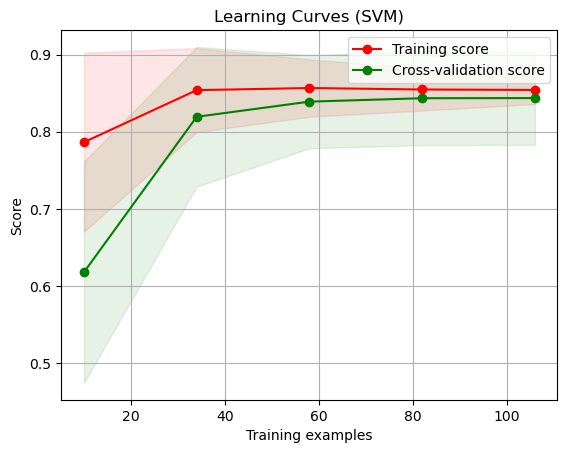

C:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[13  2  0]
 [ 3 14  1]
 [ 0  2 10]]
Normalized confusion matrix
[[0.86666667 0.13333333 0.        ]
 [0.16666667 0.77777778 0.05555556]
 [0.         0.16666667 0.83333333]]


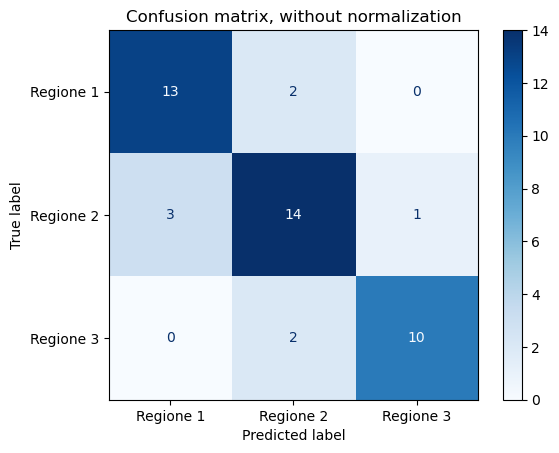

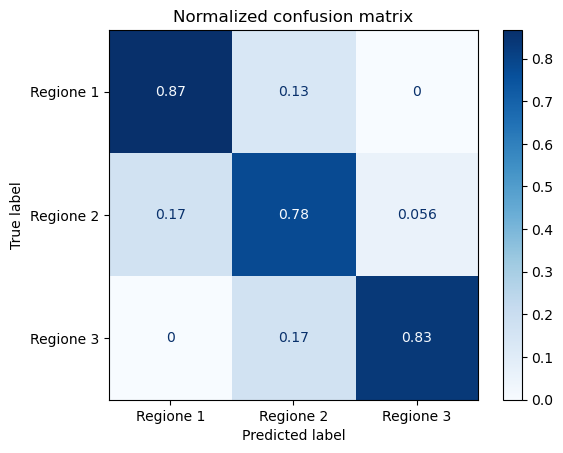

In [36]:
# LINEAR SVM

c_list = []
scores_list = []
max_score = 0
top_c = 0

for exp in range(-3, 4):
    
    # C = [0.001 , 0.01, 0.1, 1, 10, 100 ,1000]
    c = 10**exp
    c_list.append(c)
    
    # Create a LinearSVM classifier and fit it to the training  set
    svc = SVC(kernel = 'linear', C = c)
    svc.fit(X_train_pca, Y_train)
    
    # Find C which corresponds to max accuracy on the validation set
    cv_scores = cross_val_score(svc, X_train_pca, Y_train, cv=5)
    score = np.mean(cv_scores)
    scores_list.append(score)
    if(score > max_score):
        max_score = score
        top_c = c
        
    #print("\tMean accuracy with C = 10^%d on the validation set = %.3f\n" %(np.log10(c), score))

plt.xscale('log')   
plt.plot(c_list, scores_list, 'ro')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title("Accuracy when changing C")
plt.show()

print("\nThe best accuracy is %.3f, obtained with C = 10^%d" 
      % (max_score, np.log10(top_c)))

svc = SVC(kernel = 'linear', C = top_c)
svc.fit(X_train_pca, Y_train)
score = svc.score(X_test_pca, Y_test)
print()
print("\nAccuracy for C = 10^%d on the test set is %.3f\n\n\n"
      % (np.log10(top_c), score))

y_pred = svc.predict(X_test_pca)
print(classification_report(Y_test, y_pred, target_names = ['Regione 1', 'Regione 2', 'Regione 3']))

title = "Learning Curves (SVM)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
plot_learning_curve(svc, title, X_train_pca, Y_train, cv=cv, n_jobs=4)
plt.show()

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test_pca, Y_test,
                                 display_labels=['Regione 1', 'Regione 2', 'Regione 3'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

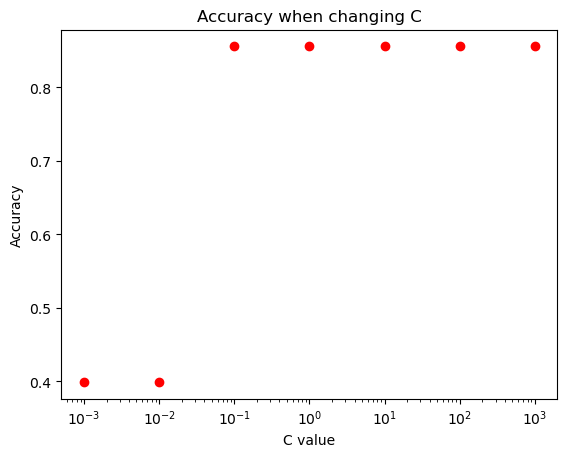


The best accuracy is 0.856, obtained with C = 10^-1


Accuracy for C = 10^-1 on the test set is 0.822



              precision    recall  f1-score   support

   Regione 1       0.81      0.87      0.84        15
   Regione 2       0.78      0.78      0.78        18
   Regione 3       0.91      0.83      0.87        12

    accuracy                           0.82        45
   macro avg       0.83      0.83      0.83        45
weighted avg       0.82      0.82      0.82        45



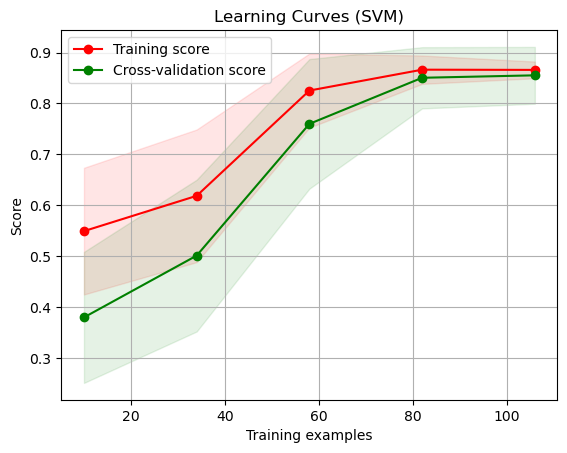

C:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[13  2  0]
 [ 3 14  1]
 [ 0  2 10]]
Normalized confusion matrix
[[0.86666667 0.13333333 0.        ]
 [0.16666667 0.77777778 0.05555556]
 [0.         0.16666667 0.83333333]]


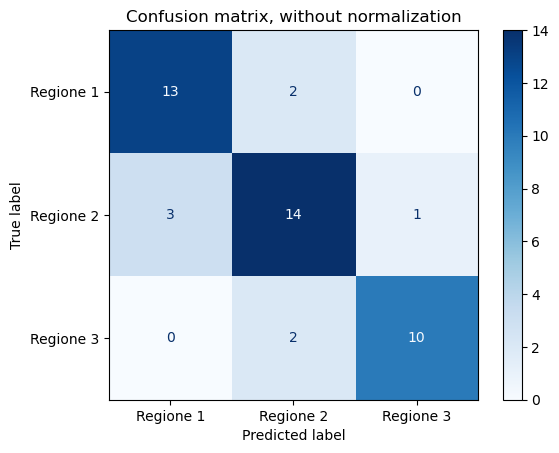

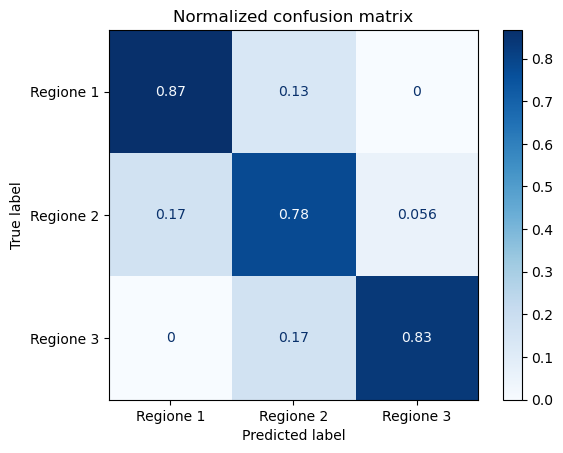

In [37]:
# Kernel SVM
    
c_list = [0.001, 0.01, 0.1, 1, 10, 100,1000]
scores_list = []
max_score = 0
top_c = 0

for c in c_list:
    
    # Create a SVM with RBF kernel classifier and fit it to the training set
    svc = SVC(kernel = 'rbf', C = c, gamma = 'auto')
    svc.fit(X_train_pca, Y_train)
    
    # Find C which corresponds to max accuracy on the validation set
    cv_scores = cross_val_score(svc, X_train_pca, Y_train, cv=5)
    score = np.mean(cv_scores)
    scores_list.append(score)
    
    if(score > max_score):
        max_score = score
        top_c = c
        
    #print("\tMean accuracy with C = 10^%d on the validation set = %.3f\n" %(np.log10(c), score))

# Plot a graph of the accuracy on the validation set when changing C
plt.xscale('log')   
plt.plot(c_list, scores_list, 'ro')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title("Accuracy when changing C")
plt.show()

print("\nThe best accuracy is %.3f, obtained with C = 10^%d" 
      % (max_score, np.log10(top_c)))

# Apply SVM with RBF kernel with top C to the test set and calculate the accuracy
svc = SVC(kernel = 'rbf', C = top_c, gamma = 'auto')
svc.fit(X_train_pca, Y_train)

score = svc.score(X_test_pca, Y_test)
print()
print("\nAccuracy for C = 10^%d on the test set is %.3f\n\n\n"
      % (np.log10(top_c), score))

y_pred = svc.predict(X_test_pca)
print(classification_report(Y_test, y_pred, target_names = ['Regione 1', 'Regione 2', 'Regione 3']))

title = "Learning Curves (SVM)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
plot_learning_curve(svc, title, X_train_pca, Y_train, cv=cv, n_jobs=4)
plt.show()

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test_pca, Y_test,
                                 display_labels=['Regione 1', 'Regione 2', 'Regione 3'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

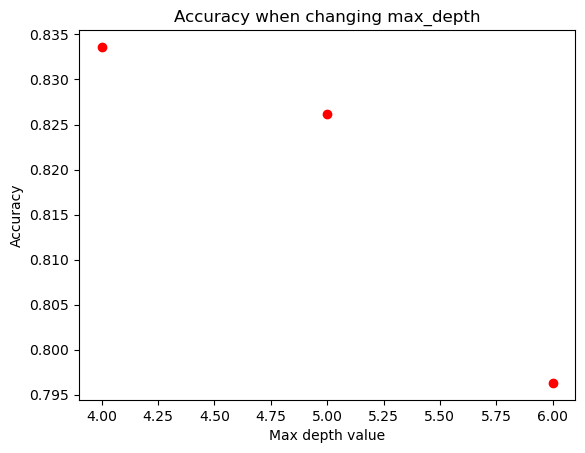


The best accuracy is 0.834, obtained with max_depth=4


Accuracy for max_depth=4 on the test set is 0.844



[Text(0.65, 0.9, 'X[0] <= 1.984\ngini = 0.658\nsamples = 133\nvalue = [44, 53, 36]'), Text(0.4, 0.7, 'X[0] <= -1.026\ngini = 0.516\nsamples = 98\nvalue = [44, 52, 2]'), Text(0.2, 0.5, 'X[0] <= -2.019\ngini = 0.324\nsamples = 54\nvalue = [43, 11, 0]'), Text(0.1, 0.3, 'X[0] <= -2.622\ngini = 0.124\nsamples = 30\nvalue = [28, 2, 0]'), Text(0.05, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0]'), Text(0.15, 0.1, 'gini = 0.231\nsamples = 15\nvalue = [13, 2, 0]'), Text(0.3, 0.3, 'X[0] <= -1.995\ngini = 0.469\nsamples = 24\nvalue = [15, 9, 0]'), Text(0.25, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'), Text(0.35, 0.1, 'gini = 0.434\nsamples = 22\nvalue = [15, 7, 0]'), Text(0.6, 0.5, 'X[0] <= 1.759\ngini = 0.129\nsamples = 44\nvalue = [1, 41, 2]'), Text(0.5, 0.3, 'X[0] <= 1.264\ngini = 0.094\nsamples = 41\nvalue = [1, 39, 1]'), Text(0.45, 0.1, 'gini = 0.059\nsamples = 33\nvalue

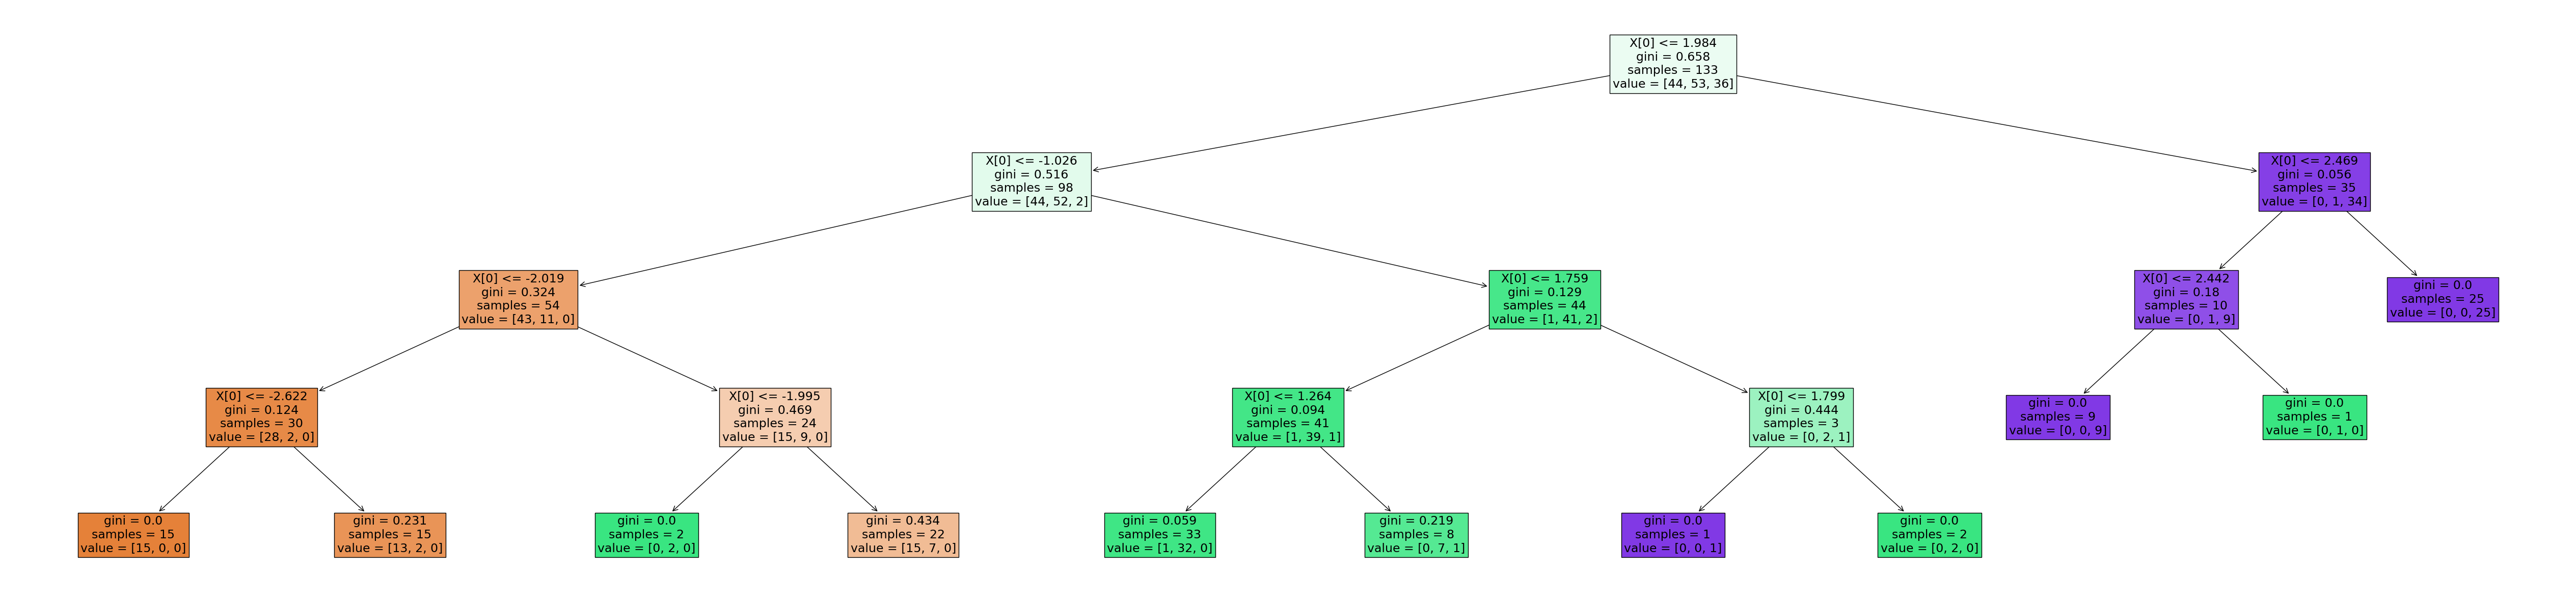

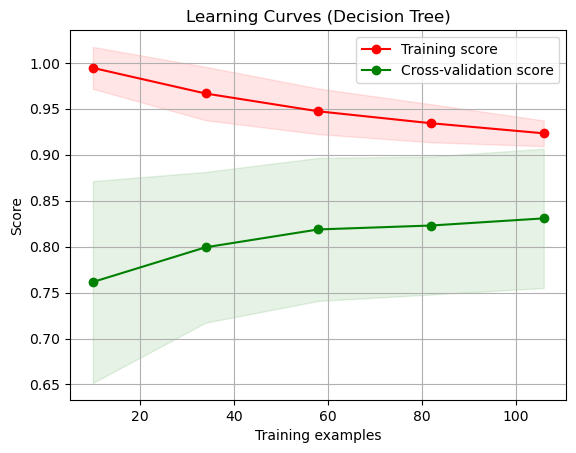

C:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[14  1  0]
 [ 3 14  1]
 [ 0  2 10]]
Normalized confusion matrix
[[0.93333333 0.06666667 0.        ]
 [0.16666667 0.77777778 0.05555556]
 [0.         0.16666667 0.83333333]]


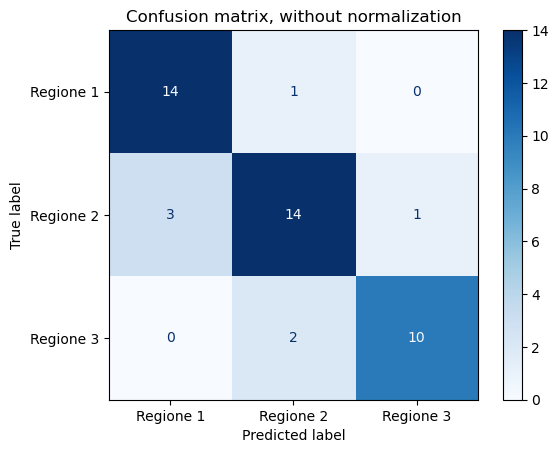

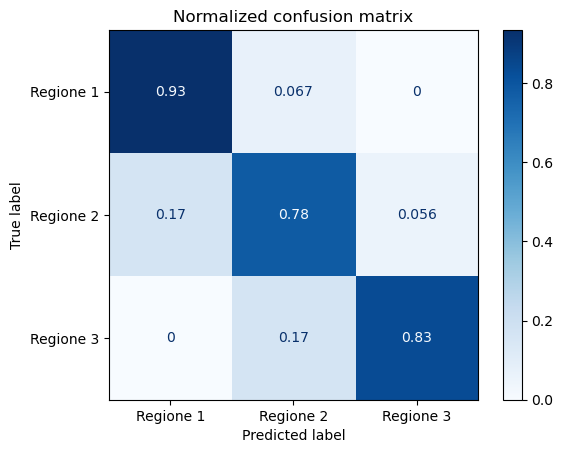

In [39]:
# Decision Tree

depth_list = range(4, 7)
scores_list = []
max_score = 0
top_depth = 0
                            
for depth in depth_list:
    
    dt = tree.DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(dt, X_train_pca, Y_train, cv=5)
    score = np.mean(cv_scores)
    scores_list.append(score)
    if(score > max_score):
        max_score = score
        top_depth = depth
        
    #print("\tMean accuracy on the validation set with max_depth = %d is %.3f\n" % (depth, score))
 
plt.plot(depth_list, scores_list, 'ro')
plt.xlabel('Max depth value')
plt.ylabel('Accuracy')
plt.title("Accuracy when changing max_depth")
plt.show()

#l'ho inserito io
print("\nThe best accuracy is %.3f, obtained with max_depth=%d" 
      % (max_score, top_depth))
        
dt = tree.DecisionTreeClassifier(max_depth=top_depth)
dt.fit(X_train_pca, Y_train)
y_pred = dt.predict(X_test_pca)

score = dt.score(X_test_pca, Y_test)
print()
print("\nAccuracy for max_depth=%d on the test set is %.3f\n\n\n"
      % (top_depth, score))

plt.figure(figsize=(65, 15))
print(tree.plot_tree(dt, max_depth=5, fontsize=17, filled=True))
print()
print(classification_report(Y_test, y_pred, target_names = ['Regione 1', 'Regione 2', 'Regione 3']))

title = "Learning Curves (Decision Tree)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
plot_learning_curve(dt, title, X_train_pca, Y_train, cv=cv, n_jobs=4)
plt.show()

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt, X_test_pca, Y_test,
                                 display_labels=['Regione 1', 'Regione 2', 'Regione 3'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

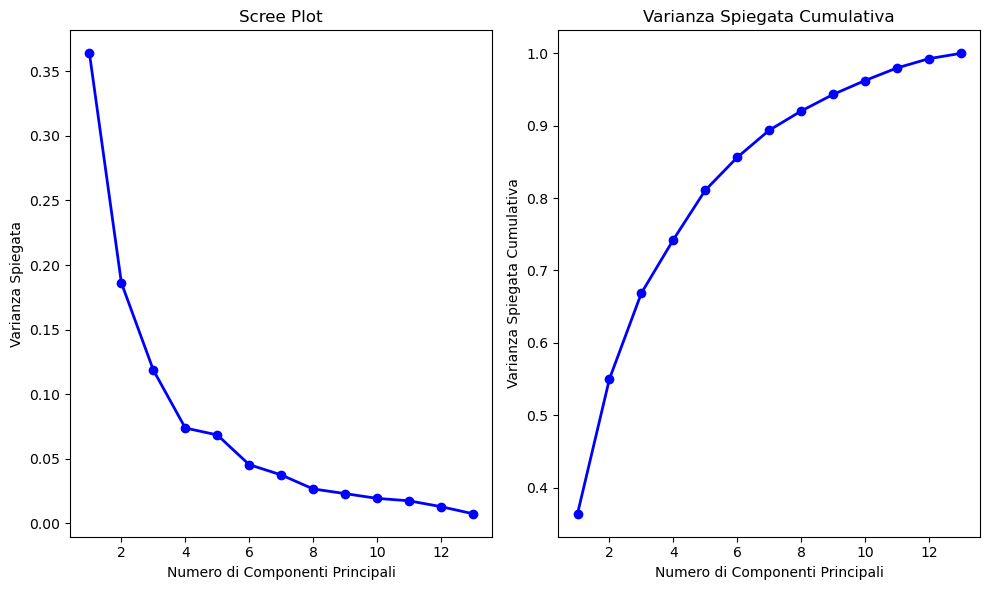

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crea un'istanza del modello PCA
pca = PCA()
pca.fit(X_train)

# Calcola la varianza spiegata cumulativa
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Traccia lo scree plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata')
plt.title('Scree Plot')

# Traccia la varianza spiegata cumulativa
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Varianza Spiegata Cumulativa')

plt.tight_layout()
plt.show()
